<a href="https://colab.research.google.com/github/NastiiaKoval/Machine-Learning/blob/main/%D0%9A%D0%BE%D0%B2%D0%B0%D0%BB%D1%8C_%D0%BF%D1%80_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання 1: Побудова регресійної моделі та запобігання перенавчанню

## Завантаження та підготовка даних:

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Завантаження даних
data = fetch_california_housing()

In [ ]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
X = pd.DataFrame(data.data, columns=data.feature_names)

y = pd.Series(data.target)

In [ ]:
# Поділ даних на навчальний і тестовий набори (80/20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
# Масштабування даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Побудова регресійної моделі:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lr = lin_reg.predict(X_test_scaled)

In [ ]:
# Оцінка базової моделі
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
print(f'Базова модель - MSE: {mse}, R2: {r2}')

Базова модель - MSE: 0.5558915986952442, R2: 0.575787706032451


## Аналіз перенавчання

In [ ]:
# Оцінка продуктивності на навчальній вибірці
y_train_pred = lin_reg.predict(X_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f'Навчальна вибірка - MSE: {train_mse}, R2: {train_r2}')

# Перевірка на перенавчання
print(f'Тестова вибірка - MSE: {mse}, R2: {r2}')

Навчальна вибірка - MSE: 0.5179331255246699, R2: 0.6125511913966952
Тестова вибірка - MSE: 0.5558915986952442, R2: 0.575787706032451


Насправді оцінка на навчальній вибірці не значно вища за тестову, тому проблема перенавчання в цьому випадку некритична взагалі.

## Запобігання перенавчанню: використання регуляризації

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
# Підбір оптимальних параметрів для Ridge та Lasso регресії за допомогою GridSearchCV
params = {'alpha': [0.1, 0.3, 0.8, 1, 10, 100]}

In [ ]:
# Ridge Regression
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, params, cv=5)
ridge_cv.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_cv.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print(f'Ridge модель - Найкращий параметр alpha: {ridge_cv.best_params_}')
print(f'Ridge модель - MSE: {ridge_mse}, R2: {ridge_r2}')

Ridge модель - Найкращий параметр alpha: {'alpha': 0.1}
Ridge модель - MSE: 0.5558879138674184, R2: 0.5757905180002312


In [ ]:
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, params, cv=5)
lasso_cv.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_cv.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print(f'Lasso модель - Найкращий параметр alpha: {lasso_cv.best_params_}')
print(f'Lasso модель - MSE: {lasso_mse}, R2: {lasso_r2}')

Lasso модель - Найкращий параметр alpha: {'alpha': 0.1}
Lasso модель - MSE: 0.6796290284328825, R2: 0.48136113250290735


## Оцінка результатів

In [ ]:
# Порівняння базової моделі та моделей з регуляризацією
print(f'Базова модель - MSE: {mse}, R2: {r2}')
print(f'Ridge модель - MSE: {ridge_mse}, R2: {ridge_r2}')
print(f'Lasso модель - MSE: {lasso_mse}, R2: {lasso_r2}')

Базова модель - MSE: 0.5558915986952442, R2: 0.575787706032451
Ridge модель - MSE: 0.5558879138674184, R2: 0.5757905180002312
Lasso модель - MSE: 0.6796290284328825, R2: 0.48136113250290735


Можемо бачити, що модель Lasso погіршує результати, тобто надмірно спрощує модель. Базова модель та модель Ridge мають помірні результати

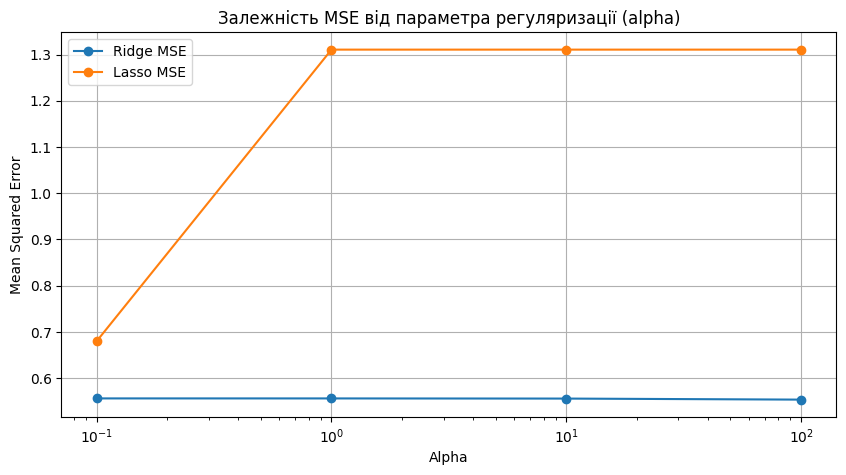

In [ ]:
import matplotlib.pyplot as plt

# Побудова графіків для регуляризації
alphas = [0.1, 1, 10, 100]
ridge_mse_list = []
lasso_mse_list = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge.predict(X_test_scaled)
    ridge_mse_list.append(mean_squared_error(y_test, y_pred_ridge))

    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso.predict(X_test_scaled)
    lasso_mse_list.append(mean_squared_error(y_test, y_pred_lasso))

# Візуалізація залежності помилки від alpha
plt.figure(figsize=(10, 5))
plt.plot(alphas, ridge_mse_list, label='Ridge MSE', marker='o')
plt.plot(alphas, lasso_mse_list, label='Lasso MSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Залежність MSE від параметра регуляризації (alpha)')
plt.legend()
plt.grid(True)
plt.show()

Цей графік показує, що з ростом значення alpha, помилка на тестовій вибірці зростає для Lasso моделі. Це підтверджує, що занадто висока регуляризація може погіршувати продуктивність моделей.

Це графік залежності MSE від параметра регуляризації, але тільки на одному конкретному поділі на навчальну та тестову вибірки.
Він не дає повної оцінки загальної продуктивності моделі, тому що результат може залежати від випадкового поділу на вибірки.

Побудуємо далі на основі крос-валідації, де моделі оцінюються на кількох поділах даних

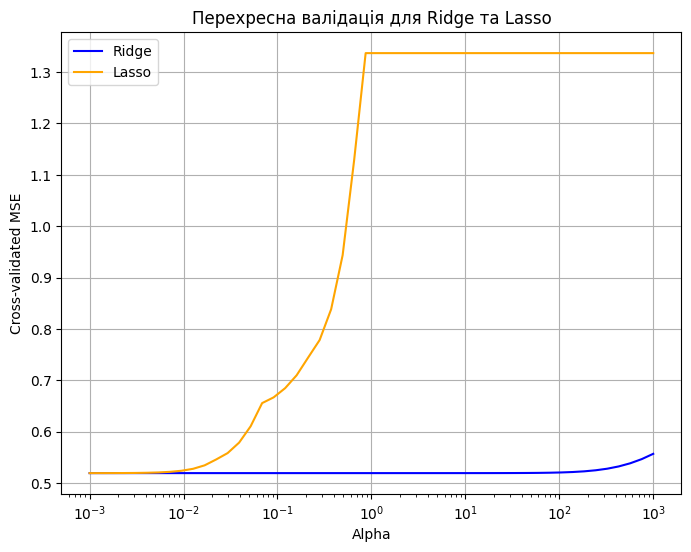

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

# Параметри alpha для регуляризації
alphas = np.logspace(-3, 3, 50)

ridge_cv_mse = []
lasso_cv_mse = []

# Виконання крос-валідації для кожного значення alpha
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)

    # Обчислення середнього MSE за допомогою крос-валідації
    ridge_mse = -cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    lasso_mse = -cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean()

    ridge_cv_mse.append(ridge_mse)
    lasso_cv_mse.append(lasso_mse)

# Побудова графіка
plt.figure(figsize=(8, 6))
plt.plot(alphas, ridge_cv_mse, label='Ridge', color='blue')
plt.plot(alphas, lasso_cv_mse, label='Lasso', color='orange')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Cross-validated MSE')
plt.title('Перехресна валідація для Ridge та Lasso')
plt.legend()
plt.grid(True)
plt.show()

Для кожного значення параметра alpha, моделі Ridge і Lasso навчаються з використанням крос-валідації (в даному випадку 5-кратної крос-валідації).
Кожен раз модель тренується на частині даних і оцінюється на іншій частині, що дозволяє отримати більш стабільну і надійну оцінку продуктивності моделі.

Це дає більш стабільний результат, оскільки усереднюється MSE за різними підмножинами даних (train/test сплітами).
Крос-валідація допомагає уникнути ситуації, коли модель випадково показує кращі або гірші результати на конкретному поділі даних.

 Для дуже малих значень alpha моделі Ridge і Lasso працюють схоже, але з ростом alpha Lasso значно погіршує продуктивність, тоді як Ridge зростає повільніше і показує стабільнішу поведінку.

## Висновок щодо перенавчання:
Ridge регуляризація виглядає найефективнішою для запобігання перенавчанню, оскільки вона стабілізує модель і не дає їй стати надто складною, при цьому не погіршуючи значно її продуктивність.

Lasso регуляризація може виявитися не найкращим вибором для цього датасету, оскільки її вплив виявляється занадто сильним, що призводить до зниження продуктивності (особливо для великих значень alpha).

Базова модель показує достатньо добрі результати, тому проблема перенавчання не є критичною для цієї задачі. Однак, Ridge регуляризація може стати хорошим підходом для стабілізації моделі в інших випадках.

# Завдання 2: Кластеризація даних

В умові завдання не сказано на якому датасеті провести кластеризацію. Тому буде проведено на попередньому датасеті housing та на датасеті рослин ірису.

## На датасеті California Housing

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Виконання кластеризації KMeans
inertia = []
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train_scaled, kmeans.labels_))

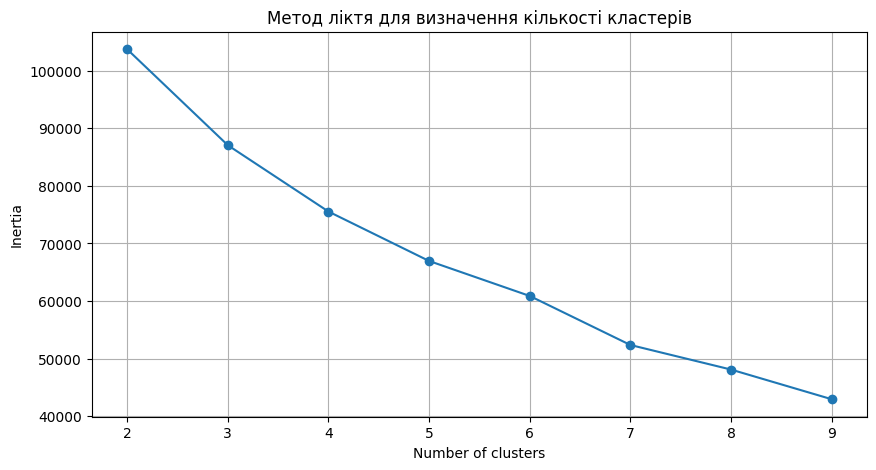

In [ ]:
# Метод ліктя
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Метод ліктя для визначення кількості кластерів')
plt.grid(True)
plt.show()

Чіткого перелому не бачимо. Графік показує, що зі збільшенням кількості кластерів інерція зменшується, але після певної точки (можливо
𝐾
=
4
) зменшення інерції стає менш помітним.

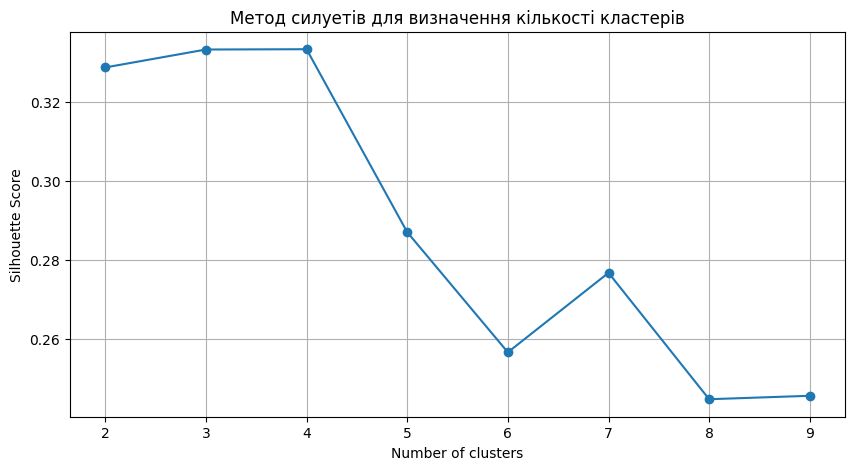

In [ ]:
# Метод силуетів
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Метод силуетів для визначення кількості кластерів')
plt.grid(True)
plt.show()

Найвищий Silhouette Score спостерігається при K = 3 і K = 4. Також є анмомальний зріст метрики силуету при к=7. Це вказує на те, що три або чотири кластери можуть бути оптимальною кількістю кластерів для даних. Візуалізуємо їх ці кластери нижче

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Використаємо KMeans для K=3 і K=4
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_4 = KMeans(n_clusters=4, random_state=42)

# Проведемо кластеризацію на тренувальних даних
clusters_3 = kmeans_3.fit_predict(X_train_scaled)
clusters_4 = kmeans_4.fit_predict(X_train_scaled)

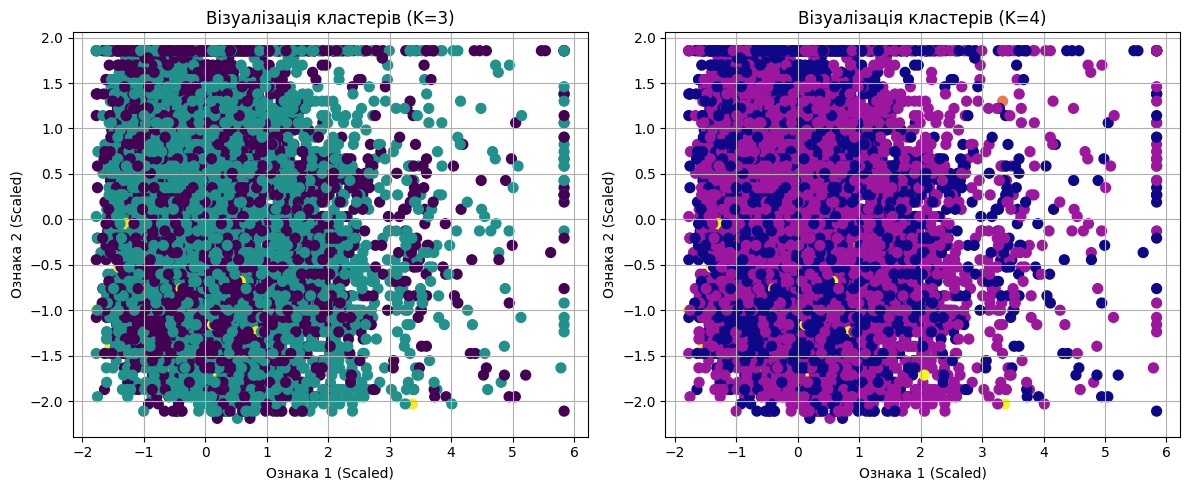

In [ ]:
# Візуалізація кластерів для K=3
plt.figure(figsize=(12, 5))

# Візуалізація для K=3
plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=clusters_3, cmap='viridis', marker='o', s=50)
plt.title('Візуалізація кластерів (K=3)')
plt.xlabel('Ознака 1 (Scaled)')
plt.ylabel('Ознака 2 (Scaled)')
plt.grid(True)

# Візуалізація для K=4
plt.subplot(1, 2, 2)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=clusters_4, cmap='plasma', marker='o', s=50)
plt.title('Візуалізація кластерів (K=4)')
plt.xlabel('Ознака 1 (Scaled)')
plt.ylabel('Ознака 2 (Scaled)')
plt.grid(True)

plt.tight_layout()
plt.show()


Графік показує візуалізацію кластерів на основі двох ознак: MedInc (середній дохід) - ознака 1, й HouseAge (вік будинку) - ознака 2.

Загалом кластери змішані, не видно чіткого розподілу.
Розрахуємо нижче конкретну метрику силуету для кожного випадку:

In [ ]:
# Розраховуємо метрику силуету для k=3
from sklearn import metrics

centroids = kmeans_3.cluster_centers_
s = metrics.silhouette_score(X, clusters_3, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: -0.17


In [ ]:
# Розраховуємо метрику силуету для k=4
from sklearn import metrics

centroids = kmeans_4.cluster_centers_
s = metrics.silhouette_score(X, clusters_4, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: -0.18


## Висновок
Метрика силуету дуже низька в обох випадках. Об'єкт погано схожий на власний кластер порівняно з іншими кластерами. Для даного датасету поганий варіант побудови кластеризації, оптимальним варіанто є лінійна регресія, яку проводили вище.

##Iris plants dataset

Кластеризуємо дані про характеристики [рослин іриса](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset). Цей набір даних є розміченим, тому ми можемо порівняти результати кластеризації зі справжніми мітками

Назви ознак в наборі даних Ірис:

sepal length (cm) — довжина чашолистка (см)
sepal width (cm) — ширина чашолистка (см)
petal length (cm) — довжина пелюстки (см)
petal width (cm) — ширина пелюстки (см)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Завантаження датасету Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

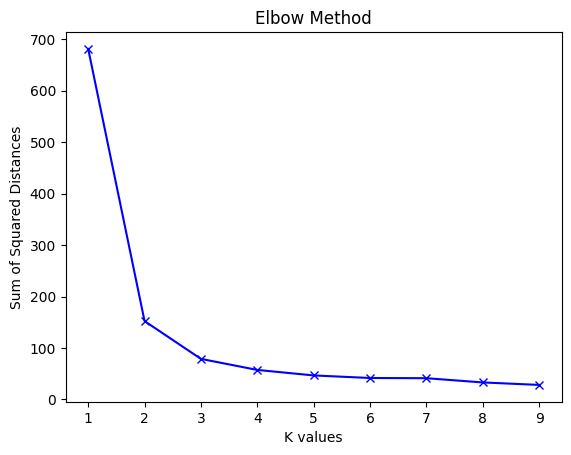

In [ ]:
# Метод ліктя для визначення оптимальної кількості кластерів
K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

Бачимо, що зниження йде після 2-3. Одне з цих чисел буде оптимальним для кількості кластерів. Далі проведемо кластеризацію для трьох кластерів та подивимось на метрику силуету.

In [ ]:
# Використаємо оптимальне значення K (припустимо, K=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Додавання результатів кластеризації до датасету
X['Cluster'] = clusters

In [ ]:
# Розраховуємо метрику силуету
from sklearn import metrics

centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X, clusters, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.67


Маємо доволі гарний показник для трьох кластерів. Спробуємо ще розрахувати метрику для двох кластерів та чотирьох.

In [ ]:
# Для двох класетрів
kmeans_2 = KMeans(n_clusters=2, random_state=42)
clusters_2 = kmeans_2.fit_predict(X_scaled)

# Додавання результатів кластеризації до датасету
X['Cluster'] = clusters_2

centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X, clusters_2, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.70


Для двох кластерів маємо кращий показник - 0.70

In [ ]:
# Для чотирьох класетрів
kmeans_4 = KMeans(n_clusters=4, random_state=42)
clusters_4 = kmeans_4.fit_predict(X_scaled)

# Додавання результатів кластеризації до датасету
X['Cluster'] = clusters_4

centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X, clusters_4, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.52


Для чотирьох класетрів показник гіришй. Візуалізуємо графік для трьох кластерів та для двох.

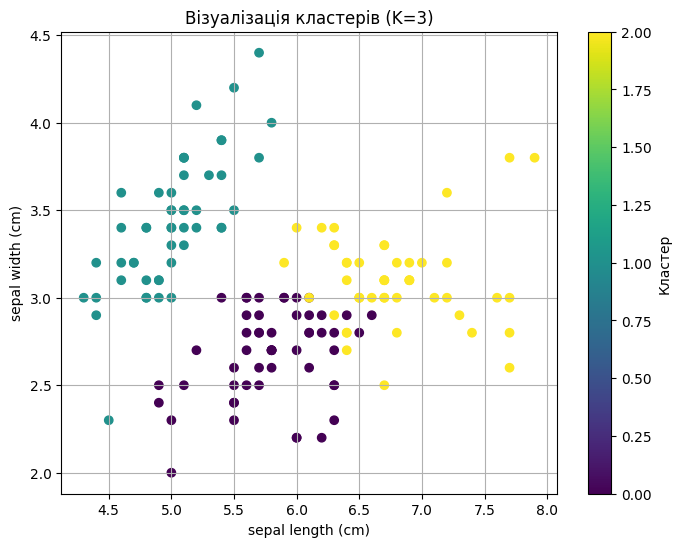

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=clusters)
plt.title(f'Візуалізація кластерів (K={optimal_k})')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.grid(True)
plt.colorbar(label='Кластер')
plt.show()

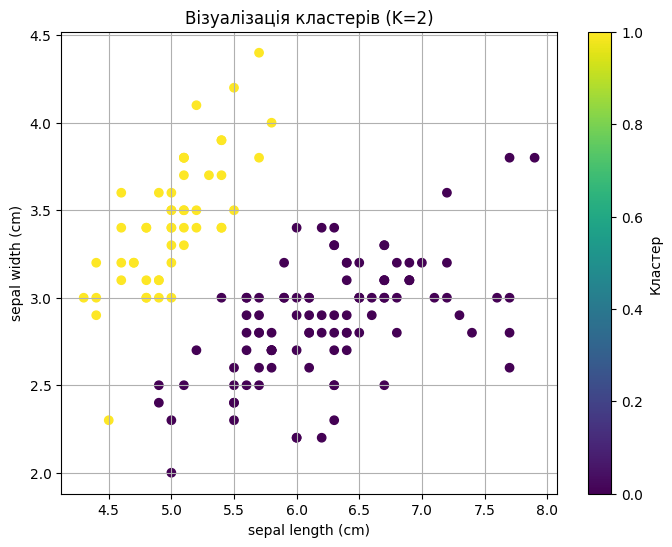

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=clusters_2)
plt.title(f'Візуалізація кластерів (K=2)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.grid(True)
plt.colorbar(label='Кластер')
plt.show()

## Висновок
Маємо найкраший варіант за метрикою силуету - 2 кластери для датасету рослин ірису. Хоча я б обрала варіант з трьома кластерами. Графік для кластеру 0, коли n_clusters дорівнює 2, більший за розміром через групування 2-ох субкластерів в один великий кластер.

Це відповідає тому, що ми знаємо про справжні мітки для Iris (вони також розбиті на 3 класи: Setosa, Versicolor, Virginica).
При K=3 кластери добре відокремлюють один одного, що підтверджує реальну класифікацію.

Отже, кластеризація для набору даних Iris дала досить чіткі результати, які відповідають реальним міткам цього датасету.